In [37]:
# Col1: Building unit type --- cancel
# Col5: Longitude --- cancel
# Col6: Latitude --- cancel
# Col8: Building Unit --- cancel

#################### 要用的 column ####################
# Col2: Building Location # 什麼大廈他大概的價錢範圍
# Col3: Building Estate
# Col4: District
# Col7: Building Floor


# Col9: Building Net Area
# Col10: Building Gross Area
# Col12: Price per net area
# Col13: Price per gross area


# Col11: Building Price hkd (Example: 787 -> 7.78 M hkd) 要轉換價格
# Col14: Transaction date
# Col15: % change from previous transaction (same unit)
# Col16: date of previous transaction
#
############################################################

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [39]:
data = "properties.csv"
df = pd.read_csv(data, encoding='utf-8')
df_backup = df.copy()


print(df.head())
print("="*100)
print(df.info())

/var/folders/_1/w3rmdmrx14qdr85c4l_crhq80000gn/T/ipykernel_86763/4257602915.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, encoding='utf-8')


  Building unit type Building Location  Building Estate District  Longitude  \
0         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
1         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
2         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
3         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
4         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   

   Latitude Building Floor Building Unit Building Net Area  \
0   22.2871             26             A               787   
1   22.2871             26             A               787   
2   22.2871             26             B               624   
3   22.2871             26             B               624   
4   22.2871             26             B               624   

  Building Gross Area  Building Price hkd Price per net area  \
0                   -                1165             14,806   
1                   -   

In [40]:
# Drop 4 useless columns
# Remove missing values
print("缺失值统计:")
print(df.isnull().sum())

print("\n缺失值比例:")
print(df.isnull().mean().round(4) * 100)

缺失值统计:
Building unit type                                     0
Building Location                                      0
Building Estate                                        0
District                                               0
Longitude                                              0
Latitude                                               0
Building Floor                                       329
Building Unit                                       1949
Building Net Area                                      0
Building Gross Area                                    0
Building Price hkd                                     0
Price per net area                                     0
Price per gross area                                   0
Transaction date                                       0
% change from previous transaction (same unit)    652131
date of previous transaction                      652131
dtype: int64

缺失值比例:
Building unit type                                 0.00
Buil

In [41]:
# 1. 删除两列：% change from previous transaction (same unit) 和 date of previous transaction
print("Before drop:")
print("="*100)
print(df.head())

columns_to_remove = ['Price per gross area','Building Gross Area','Building unit type','Longitude','Latitude','Building Unit','% change from previous transaction (same unit)', 'date of previous transaction']
df = df.drop(columns=columns_to_remove)
print("="*100)
print("")
print("After drop:")
print("="*100)
print(df.head())


print(f"删除列后的数据形状: {df.shape}")
print(f"\n当前列名:")
print(df.columns.tolist())

# 2. 只保留 2017 和 2018 年的数据
# 将 Transaction date 转换为字符串类型（如果还不是）

print("")
print("="*100)
print("Remove year except 2017 and 2018:")
print("="*100)
df['Transaction date'] = df['Transaction date'].astype(str)

# 筛选 2017 和 2018 年的数据
df = df[df['Transaction date'].str.startswith('2017') | df['Transaction date'].str.startswith('2018')]

print(f"\n筛选后的数据形状: {df.shape}")

# 检查年份分布
df['year'] = df['Transaction date'].str[:4]
print(f"\n年份分布:")
print(df['year'].value_counts().sort_index())

# 删除临时的年份列
df = df.drop(columns=['year'])

print(f"\n前5行数据:")
print(df.head())


Before drop:
  Building unit type Building Location  Building Estate District  Longitude  \
0         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
1         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
2         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
3         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   
4         B000000014      Taikoo Shing  Fu Tien Mansion      EST   114.2175   

   Latitude Building Floor Building Unit Building Net Area  \
0   22.2871             26             A               787   
1   22.2871             26             A               787   
2   22.2871             26             B               624   
3   22.2871             26             B               624   
4   22.2871             26             B               624   

  Building Gross Area  Building Price hkd Price per net area  \
0                   -                1165             14,806   
1          

In [42]:
print(df['Price per net area'].max())
print("=======")
print(df['Price per net area'].min())


99,913
* 
				
				
					-


In [43]:
print(df['Price per net area'].max())

99,913



列名: Price per net area
最大值: 425,568.00
425568.0
最小值: 12.00
平均值: 13,253.71
中位数: 12,673.00
数据量: 54,138


/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hongqiaoshan/Library/Python/3.11/lib/python/site-packages/IPython/cor

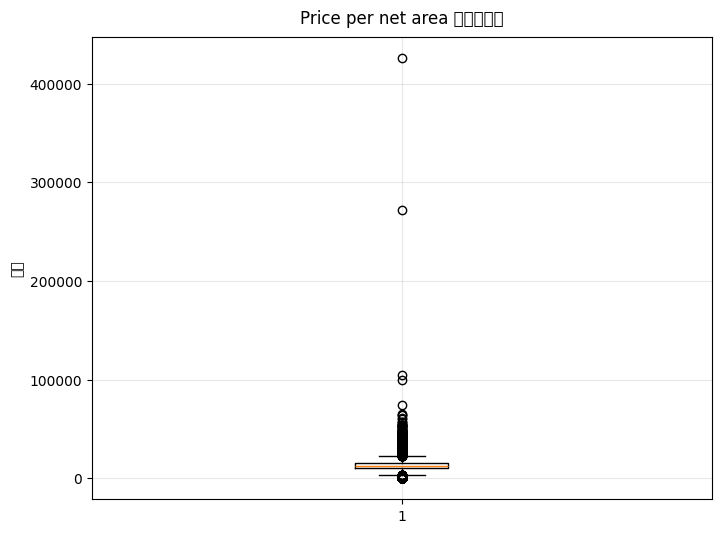

In [49]:
# ==================== 箱型图配置区 ====================
# 在这个列表中添加你想要绘制箱型图的列名
columns_to_plot = [
    'Price per net area',
    # 'Building Net Area',  # 取消注释来添加新的列
    # 'Building Price hkd',  # 取消注释来添加新的列
]
# ======================================================

# 数据预处理：将字符串类型的数值列转换为数字
def convert_to_numeric(series):
    """将包含逗号的字符串转换为数值"""
    if series.dtype == 'object':
        # 移除逗号并转换为数值
        return pd.to_numeric(series.str.replace(',', ''), errors='coerce')
    return series

# 为每个列绘制箱型图
num_plots = len(columns_to_plot)
if num_plots > 0:
    # 计算子图布局
    cols = min(2, num_plots)  # 每行最多2个图
    rows = (num_plots + cols - 1) // cols  # 计算需要的行数
    
    fig, axes = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))
    
    # 如果只有一个图，将axes转换为数组方便统一处理
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if num_plots > 1 else [axes]
    
    for idx, col_name in enumerate(columns_to_plot):
        if col_name in df.columns:
            # 转换数据为数值类型
            # print("len(df[col_name])",len(df[col_name]))
            # 為什麼 len(df[col_name]) 會比 len(data)的樣本量大，因為有一些 亂碼 例如空格 星號被過濾了
            data = convert_to_numeric(df[col_name]).dropna()
            
            # 绘制箱型图
            axes[idx].boxplot(data)
            axes[idx].set_title(f'{col_name} 分布箱型图', fontsize=12, pad=10)
            axes[idx].set_ylabel('数值', fontsize=10)
            axes[idx].grid(True, alpha=0.3)
            
            # 显示统计信息
            print(f"\n{'='*60}")
            print(f"列名: {col_name}")
            print(f"{'='*60}")
            print(f"最大值: {data.max():,.2f}")
            print(data.max())
            print(f"最小值: {data.min():,.2f}")
            print(f"平均值: {data.mean():,.2f}")
            print(f"中位数: {data.median():,.2f}")
            print(f"数据量: {len(data):,}")
        else:
            axes[idx].text(0.5, 0.5, f'列 "{col_name}" 不存在', 
                          ha='center', va='center', fontsize=12)
            axes[idx].set_title(f'错误: {col_name}', fontsize=12)
    
    # 隐藏多余的子图
    for idx in range(num_plots, len(axes)):
        axes[idx].set_visible(False)
    
    # plt.tight_layout()
    plt.show()
else:
    print("请在 columns_to_plot 列表中添加要绘制的列名")



In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 75414 entries, 13 to 1262495
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Building Location   75414 non-null  object
 1   Building Estate     75414 non-null  object
 2   District            75414 non-null  object
 3   Building Floor      75377 non-null  object
 4   Building Net Area   75414 non-null  object
 5   Building Price hkd  75414 non-null  int64 
 6   Price per net area  75414 non-null  object
 7   Transaction date    75414 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.2+ MB
None


In [50]:
# ==================== 箱型图详细统计信息 ====================
# 使用与上面相同的列配置
import numpy as np

for col_name in columns_to_plot:
    if col_name in df.columns:
        # 转换数据为数值类型（与上面的处理保持一致）
        data = convert_to_numeric(df[col_name]).dropna()
        
        # 计算箱型图的五数概括
        Q1 = data.quantile(0.25)  # 下四分位数（第一四分位数）
        Q2 = data.quantile(0.50)  # 中位数（第二四分位数）
        Q3 = data.quantile(0.75)  # 上四分位数（第三四分位数）
        IQR = Q3 - Q1  # 四分位距
        
        # 计算箱型图的"须"（whiskers）的范围
        # 箱型图中的最小值和最大值是指"须"的端点，不是数据的实际最小/最大值
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR
        
        # 箱型图显示的最小值和最大值（须的端点）
        box_min = data[data >= lower_whisker].min()  # 在下界内的最小值
        box_max = data[data <= upper_whisker].max()  # 在上界内的最大值
        
        # 识别异常值
        outliers_lower = data[data < lower_whisker]  # 小于下界的异常值
        outliers_upper = data[data > upper_whisker]  # 大于上界的异常值
        
        # 显示统计信息
        print(f"\n{'='*70}")
        print(f"列名: {col_name}")
        print(f"{'='*70}")
        print(f"\n【箱型图五数概括】")
        print(f"最大值（箱须上端）: {box_max:,.2f}")
        print(f"上四分位数（Q3）:   {Q3:,.2f}")
        print(f"中位数（Q2）:       {Q2:,.2f}")
        print(f"下四分位数（Q1）:   {Q1:,.2f}")
        print(f"最小值（箱须下端）: {box_min:,.2f}")
        print(f"\n【异常值统计】")
        print(f"异常值判定标准:")
        print(f"  - 下界 = Q1 - 1.5×IQR = {Q1:,.2f} - 1.5×{IQR:,.2f} = {lower_whisker:,.2f}")
        print(f"  - 上界 = Q3 + 1.5×IQR = {Q3:,.2f} + 1.5×{IQR:,.2f} = {upper_whisker:,.2f}")
        
        print(f"\n小于下界的异常值:")
        print(f"  数量: {len(outliers_lower)} 个")
        if len(outliers_lower) > 0:
            print(f"  范围: [{outliers_lower.min():,.2f}, {outliers_lower.max():,.2f}]")
            print(f"  占比: {len(outliers_lower)/len(data)*100:.2f}%")
        else:
            print(f"  范围: 无")
        
        print(f"\n大于上界的异常值:")
        print(f"  数量: {len(outliers_upper)} 个")
        if len(outliers_upper) > 0:
            print(f"  范围: [{outliers_upper.min():,.2f}, {outliers_upper.max():,.2f}]")
            print(f"  占比: {len(outliers_upper)/len(data)*100:.2f}%")
        else:
            print(f"  范围: 无")
        
        print(f"\n总异常值数量: {len(outliers_lower) + len(outliers_upper)} 个 (占比: {(len(outliers_lower) + len(outliers_upper))/len(data)*100:.2f}%)")
        print(f"正常值数量: {len(data) - len(outliers_lower) - len(outliers_upper)} 个")
        print(f"{'='*70}\n")
    else:
        print(f"列 '{col_name}' 不存在于数据框中")



列名: Price per net area

【箱型图五数概括】
最大值（箱须上端）: 23,037.00
上四分位数（Q3）:   15,478.00
中位数（Q2）:       12,673.00
下四分位数（Q1）:   10,438.00
最小值（箱须下端）: 2,894.00

【异常值统计】
异常值判定标准:
  - 下界 = Q1 - 1.5×IQR = 10,438.00 - 1.5×5,040.00 = 2,878.00
  - 上界 = Q3 + 1.5×IQR = 15,478.00 + 1.5×5,040.00 = 23,038.00

小于下界的异常值:
  数量: 449 个
  范围: [12.00, 2,873.00]
  占比: 0.83%

大于上界的异常值:
  数量: 1827 个
  范围: [23,040.00, 425,568.00]
  占比: 3.37%

总异常值数量: 2276 个 (占比: 4.20%)
正常值数量: 51862 个



In [ ]:
# ==================== 添加房屋昂贵程度分类列 ====================
# 基于 Price per net area 创建价格等级分类（0-5）

# 首先转换 Price per net area 为数值类型
df['Price per net area numeric'] = convert_to_numeric(df['Price per net area'])

# 计算箱型图的统计值（用于分类）
data_for_stats = df['Price per net area numeric'].dropna()
Q1 = data_for_stats.quantile(0.25)
Q2 = data_for_stats.quantile(0.50)  # 中位数
Q3 = data_for_stats.quantile(0.75)
IQR = Q3 - Q1

# 箱型图的须端点
box_min = data_for_stats[data_for_stats >= (Q1 - 1.5 * IQR)].min()
box_max = data_for_stats[data_for_stats <= (Q3 + 1.5 * IQR)].max()

# 创建价格等级分类函数
def classify_price_level(price):
    """
    根据价格将房屋分为6个等级（0-5）
    0: 小于箱须下端（异常低价）
    1: 箱须下端 到 Q1（低价）
    2: Q1 到 中位数（中低价）
    3: 中位数 到 Q3（中高价）
    4: Q3 到 箱须上端（高价）
    5: 大于箱须上端（异常高价）
    NaN: 无效数据
    """
    if pd.isna(price):
        return np.nan
    elif price < box_min:
        return 0
    elif price < Q1:
        return 1
    elif price < Q2:
        return 2
    elif price < Q3:
        return 3
    elif price <= box_max:
        return 4
    else:  # price > box_max
        return 5

# 应用分类函数创建新列
df['Price Level'] = df['Price per net area numeric'].apply(classify_price_level)

# 显示分类结果统计
print("="*70)
print("房屋价格等级分类完成！")
print("="*70)
print(f"\n分类标准:")
print(f"  Level 0 (异常低价):  < {box_min:,.2f}")
print(f"  Level 1 (低价):      [{box_min:,.2f}, {Q1:,.2f})")
print(f"  Level 2 (中低价):    [{Q1:,.2f}, {Q2:,.2f})")
print(f"  Level 3 (中高价):    [{Q2:,.2f}, {Q3:,.2f})")
print(f"  Level 4 (高价):      [{Q3:,.2f}, {box_max:,.2f}]")
print(f"  Level 5 (异常高价):  > {box_max:,.2f}")
print(f"  NaN (无效数据):      无法识别的值")

print(f"\n各等级样本数量:")
print(df['Price Level'].value_counts().sort_index())

print(f"\n包含NaN的样本数量: {df['Price Level'].isna().sum()}")
print(f"\n新列 'Price Level' 已添加到数据框中")
print(f"当前数据框形状: {df.shape}")
print("="*70)


In [ ]:
# ==================== 可视化价格等级分布 ====================
# 绘制柱状图显示各价格等级的频率

# 统计各等级的频率
price_level_counts = df['Price Level'].value_counts().sort_index()

# 创建柱状图
plt.figure(figsize=(12, 7))

# 绘制柱状图
bars = plt.bar(price_level_counts.index, price_level_counts.values, 
               color=['#d62728', '#ff7f0e', '#ffbb78', '#98df8a', '#2ca02c', '#8c564b'],
               edgecolor='black', linewidth=1.2, alpha=0.8)

# 在柱子上添加数值标签
for i, (level, count) in enumerate(price_level_counts.items()):
    percentage = (count / len(df['Price Level'].dropna())) * 100
    plt.text(level, count, f'{count:,}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# 设置标题和标签
plt.title('房屋价格等级分布图 (Price Level Distribution)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('价格等级 (Price Level)', fontsize=13, fontweight='bold')
plt.ylabel('样本数量 (Frequency)', fontsize=13, fontweight='bold')

# 设置x轴刻度
plt.xticks(range(6), 
           ['Level 0\n(异常低价)', 'Level 1\n(低价)', 'Level 2\n(中低价)', 
            'Level 3\n(中高价)', 'Level 4\n(高价)', 'Level 5\n(异常高价)'],
           fontsize=10)

# 添加网格线
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 添加统计信息文本框
stats_text = f'总样本数: {len(df):,}\n有效样本: {len(df["Price Level"].dropna()):,}\n无效样本(NaN): {df["Price Level"].isna().sum():,}'
plt.text(0.98, 0.97, stats_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# 打印详细统计信息
print("\n" + "="*70)
print("价格等级分布统计")
print("="*70)
for level in range(6):
    count = price_level_counts.get(level, 0)
    percentage = (count / len(df['Price Level'].dropna())) * 100 if len(df['Price Level'].dropna()) > 0 else 0
    level_names = ['异常低价', '低价', '中低价', '中高价', '高价', '异常高价']
    print(f"Level {level} ({level_names[level]:6s}): {count:6,} 样本 ({percentage:5.2f}%)")

print(f"\n有效样本总数: {len(df['Price Level'].dropna()):,}")
print(f"无效样本(NaN): {df['Price Level'].isna().sum():,}")
print(f"总样本数:     {len(df):,}")
print("="*70)
